In [1]:
#importing libraries


import pandas as pd
from sklearn.model_selection import train_test_split 

In [2]:
#importing dataset

data = pd.read_csv("preprocessed_data.csv")


x = data.drop(columns = 'diagnosis')
y = data['diagnosis']

In [3]:
#Splitting data into training and test sets

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [4]:
#Testing for best model


import lazypredict
from lazypredict.Supervised import LazyClassifier


clf = LazyClassifier(verbose=0,ignore_warnings=True)
models, predictions = clf.fit(x_train, x_test, y_train, y_test)
models

/home/jyotbuch/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)
100%|███████████████████████████████████████████| 29/29 [00:01<00:00, 14.62it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
XGBClassifier,0.98,0.98,None,0.98,0.25
AdaBoostClassifier,0.98,0.98,None,0.98,0.18
LGBMClassifier,0.98,0.98,None,0.98,0.12
SVC,0.97,0.97,None,0.97,0.06
PassiveAggressiveClassifier,0.96,0.96,None,0.96,0.02
ExtraTreesClassifier,0.96,0.96,None,0.96,0.11
BaggingClassifier,0.96,0.96,None,0.96,0.06
LogisticRegression,0.96,0.96,None,0.96,0.08
CalibratedClassifierCV,0.96,0.96,None,0.96,0.04


In [5]:
#XGB has the highest balanced accuracy


from xgboost import XGBClassifier

xgb =XGBClassifier(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

xgb.fit(x_train, y_train)

[09:34:31] WARNING: /workspace/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[09:34:31] WARNING: /workspace/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=10, n_jobs=0, num_parallel_tree=1,
              objective='reg:linear', random_state=0, reg_alpha=10,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

Text(0.5, 1.0, 'Confusion Matrix')

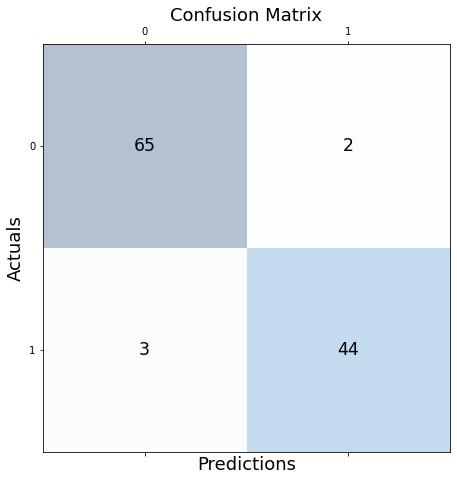

In [6]:
predictions = xgb.predict(x_test)

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,mean_squared_error,r2_score

confusionmatrix = confusion_matrix(y_test, predictions)

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(confusionmatrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confusionmatrix.shape[0]):
    for j in range(confusionmatrix.shape[1]):
        ax.text(x=j, y=i,s=confusionmatrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)

In [7]:
print("Test Score: ",xgb.score(x_test,y_test)*100)

Test Score:  95.6140350877193


In [8]:
predicteddata = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
predicteddata.to_csv("predictions.csv", index=False)
predicteddata

,Actual,Predicted
512,M,M
457,B,B
439,B,B
298,B,B
37,B,B
...,...,...
213,M,M
519,B,B
432,M,M
516,M,M


In [9]:
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score
print(f"Accuracy: {round(accuracy_score(y_test, predicteddata), 2)}") 
print(f"Precision: {round(precision_score(y_test, predicteddata), 2)}")
print(f"Recall: {round(recall_score(y_test, predicteddata), 2)}")
print(f"F1_score: {round(f1_score(y_test, predicteddata), 2)}")

ValueError: Classification metrics can't handle a mix of binary and multiclass-multioutput targets